In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [3]:
image = mpimg.imread('data/exit-ramp.jpg')

In [4]:
np.shape(image)

(540, 960, 3)

In [5]:
def show_image(img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.show()

def show_grey_image(img, cmap="Greys_r"):
    show_image(img, cmap)

# Convert to grayscale

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

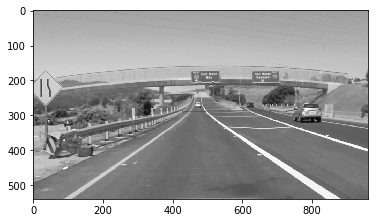

In [7]:
show_grey_image(gray)

# Gaussian Blur

In [266]:
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

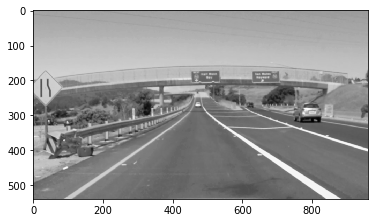

In [9]:
show_grey_image(blur_gray)

In [195]:
low_threshold = 50
high_threshold = 150

# Canny Edge detection

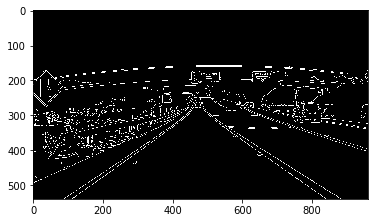

In [196]:
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
show_grey_image(edges)

# Region of interest masking

(0, 270.0)
(441.99601338663507, 270.0)
(960, 270.0)
(518.003986613365, 270.0)
((0, 270.0), (960, 270.0), (960, 540), (0, 540))


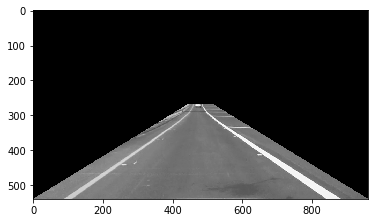

In [438]:
def compute_slope(line):
    line = [float(coord) for coord in line]
    x1 = line[0]
    y1 = line[1]
    x2 = line[2]
    y2 = line[3]
    
    if (x2-x1 > 0):
        slope = float((y2-y1)/(x2-x1))
    else:
        return None

    return slope

def compute_y_intercept(m, x, y):        
    b = y - (-m*x)
    return b

def compute_x(y,m,b):
    return (y-b)/-m

def tan_deg(deg):
    return(math.pi/180*deg)

mask = np.zeros_like(edges)
ignore_mask_color = 255

mask_top_region = 0.5
mask_left_region = 0
mask_right_region = 1

# Rectangular mask
top_left = (imshape[1] * mask_left_region, imshape[0] * mask_top_region)
bottom_left = (imshape[1] * mask_left_region, imshape[0])
bottom_right = (imshape[1] * mask_right_region, imshape[0])
top_right = (imshape[1] * mask_right_region,imshape[0] * mask_top_region)

# Polygon mask
m = tan_deg(35)
b = compute_y_intercept(m, bottom_left[0], bottom_left[1])
new_top_left = (compute_x(top_left[1], m, b), top_left[1])

print(top_left)
print(new_top_left)

m = -tan_deg(35)
b = compute_y_intercept(m, bottom_right[0], bottom_right[1])
new_top_right = (compute_x(top_right[1], m ,b), top_right[1])

vertices = np.array([
    [
        new_top_left,
        new_top_right,
        bottom_right,
        bottom_left,
    ]
], dtype=np.int32)


cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(gray, mask)
show_grey_image(masked_edges)

In [ ]:
def tan_deg(deg):
    return(math.pi/180*deg)

In [432]:
math.tan(math.pi/180*30)

0.5773502691896256

In [337]:
m = 0.4
b = compute_y_intercept(m, bottom_right)
top_left[0] = compute_x(b=b, m=m, y=top_left[1])

(739.2, 324.0)

# Hough line detection

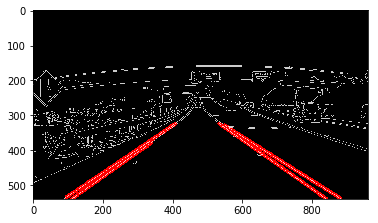

In [271]:
import math
rho = 1
theta = np.pi/180 #1 degree = pi/180 radians

intersection_threshold = 210

min_line_length = 10 #min pixels makin up a line
max_line_gap = 500 #max gap in pixels between connectable line segments

line_image = np.copy(image)*0

# * Points in the image space are converted to sine curves in the hough space.
# * Points of intersections are found in the hough space - these represent lines in the image space.
# * These points are then converted back into the image space and the line segment between the top-most point and the bottom-most point are returned as x1,y1 and x2,y2

hough_points_image_lines = cv2.HoughLinesP(masked_edges, 
                                           rho, 
                                           theta, 
                                           intersection_threshold, 
                                           np.array([]),
                                           min_line_length,
                                           max_line_gap)

# * Create a new image (line_image) which will have the detected lines

for line in hough_points_image_lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)

# show_image(line_image)

color_edges = np.dstack((edges, edges, edges))

lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)


show_image(lines_edges)